# Mobile Strategy Games

## Introduction

The mobile games industry is worth billion of dollars, with companies spending vast amounts of money on the development and marketing of these games to an equally large market.

The dataset includes 17007 strategy games on the Apple App Store. It was collected on the 3rd of August 2019, using the iTunes API and the App Store sitemap. The data used in this project was downloaded from Kaggle.

Using Python and its libraries, I will gather data, assess its quality and tidiness, then clean it. Then, I will use the number of ratings as a proxy indicator for the overall success of a game, and then work out what factors make a successful game by using univariate, bivariate and multivariate exploration.

# Gather

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

%matplotlib inline

In [2]:
# Import dataset and explore the first 5 rows
df = pd.read_csv('appstore_games.csv')
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


## Assess

In [3]:
# Visual assessment
df

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


In [4]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [5]:
# Generate useful descriptive statistics
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [6]:
# Return the number of duplicated rows
df.duplicated().sum()

160

In [7]:
# Return the number of missing values in each column
df.isna().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

### Quality
1. Average User Rating: 9446 missing values

2. User Rating Count: 9446 missing values

3. Price: 24 missing values

4. Original Release Date: wrong datatype (string instead of datetime)

5. Current Version Release Date: wrong datatype (string instead of datetime)

6. 160 duplicated records

7. Size: 1 missing value

### Tidiness

1. URL, ID, Icon URL are unnecessary

2. In-app Purchases: the values are strings of float values

3. Languages: the values are strings of strings

4. Genres: the values are strings of strings

## Clean

In [8]:
# Create a copy dataframe
df_clean = df.copy()

### Quality:

### Issue 1:
#### Define: 9446 missing values in average user rating
#### Code: replace missing values with median value

In [9]:
# Find average user rating's mean
user_rating_median = df_clean['Average User Rating'].median()
user_rating_median

4.5

In [10]:
# Replace missing values with mean value
df_clean['Average User Rating'].fillna(user_rating_median, inplace=True)

#### Test:

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             17007 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date      

### Issue 2:
#### Define: 9446 missing values in user rating count
#### Code: replace missing values with median value

In [12]:
# Find user rating count's mean
user_rating_count_median = df_clean['User Rating Count'].median()
user_rating_count_median

46.0

In [13]:
# Replace missing values with mean value
df_clean['User Rating Count'].fillna(user_rating_count_median, inplace=True)

#### Test:

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             17007 non-null float64
User Rating Count               17007 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date     

### Issue 3: 

#### Define: 24 missing values in price

#### Code: Replace missing values with mean value

In [15]:
# Find price's mean
price_mean = df_clean['Price'].mean()
price_mean

0.8134187128304518

In [16]:
# Replace missing values with mean value
df_clean['Price'].fillna(price_mean, inplace=True)

#### Test:

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             17007 non-null float64
User Rating Count               17007 non-null float64
Price                           17007 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date     

### Issue 4: 

#### Define: original release date's datatype is string instead of datetime

#### Code: convert datatype to datetime

In [18]:
# Convert datatype to datetime
df_clean['Original Release Date'] = pd.to_datetime(df_clean['Original Release Date'])

#### Test:

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             17007 non-null float64
User Rating Count               17007 non-null float64
Price                           17007 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date     

### Issue 5: 

#### Define: current version release date's datatype is string instead of datetime

#### Code: convert datatype to datetime

In [20]:
# Convert datatype to datetime
df_clean['Current Version Release Date'] = pd.to_datetime(df_clean['Current Version Release Date'])

#### Test:

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             17007 non-null float64
User Rating Count               17007 non-null float64
Price                           17007 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date     

### Issue 6:

#### Define: 160 duplicated records

#### Code: drop duplicated records

In [22]:
# Drop duplicates
df_clean.drop_duplicates()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-05-09
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,46.0,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",2019-07-30,2019-07-30
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,46.0,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",2019-01-08,2019-01-08
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,46.0,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",2019-03-08,2019-03-08
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.5,46.0,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",2019-01-08,2019-01-08


#### Test:

In [23]:
sum(df_clean.duplicated())

160

### Issue 7: 

#### Define: 1 missing value in Size

#### Code: replace missing value with mean value

In [24]:
# Find size's mean
size_mean = df_clean['Size'].mean()

In [25]:
# Replace missing value with mean value
df_clean['Size'].fillna(size_mean, inplace=True)

#### Test:

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             17007 non-null float64
User Rating Count               17007 non-null float64
Price                           17007 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17007 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date     

### Tidiness

### Issue 1:
#### Define: URL, ID, and Icon URL are unnecessary
#### Code: drop unnecessary columns

In [27]:
# Drop URL, ID, and Icon URL columns
df_clean.drop(columns=['URL', 'ID', 'Icon URL'], inplace=True)

#### Test:

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 15 columns):
Name                            17007 non-null object
Subtitle                        5261 non-null object
Average User Rating             17007 non-null float64
User Rating Count               17007 non-null float64
Price                           17007 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17007 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date           17007 non-null datetime64[ns]
Current Version Release Date    17007 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 

### Issue 2:
#### Define: In-app Purchases: the values are strings of float values
#### Code: split the string of float values and store them as a list

In [29]:
# Split the string of float values and store them as a list
df_clean['In-app Purchases'] = df_clean['In-app Purchases'].dropna().map(lambda x: list(float(i) for i in x.split(', ')))

#### Test:

In [30]:
df_clean['In-app Purchases'].dropna().head()

5                                         [1.99]
15                                        [0.99]
16                                        [0.99]
18    [1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99]
19                            [0.99, 0.99, 0.99]
Name: In-app Purchases, dtype: object

### Issue 3:
#### Define: Languages: the values are strings of strings
#### Code: split the string and store the values as a list

In [31]:
# Split the string and store the values as a list
df_clean['Languages'] = df_clean['Languages'].dropna().map(lambda x: x.split(', '))

#### Test:

In [32]:
df_clean['Languages'].dropna().head()

0    [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
1                                                 [EN]
2                                                 [EN]
3    [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
4    [DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, R...
Name: Languages, dtype: object

### Issue 4:
#### Define: Genres: the values are strings of strings
#### Code: split the string and store the values as a list

In [33]:
# Split the string and store the values as a list
df_clean['Genres'] = df_clean['Genres'].dropna().map(lambda x: x.split(', '))

#### Test:

In [34]:
df_clean['Genres'].dropna().head()

0              [Games, Strategy, Puzzle]
1               [Games, Strategy, Board]
2               [Games, Board, Strategy]
3              [Games, Strategy, Puzzle]
4    [Games, Strategy, Board, Education]
Name: Genres, dtype: object

### Issue 5:

#### Define:
#### Code:

In [35]:
# Extract rows that have primary genres as Games
games = df_clean[df_clean['Primary Genre'] == 'Games']

In [36]:
# Create the Game Genre column
df_clean['Game Genre'] = games['Genres'].map(lambda x: x[1])

#### Test:

In [37]:
df_clean['Game Genre'].head()

0    Strategy
1    Strategy
2       Board
3    Strategy
4    Strategy
Name: Game Genre, dtype: object

## Store

In [38]:
df_clean.to_csv('appstore_games_new.csv', encoding='utf-8', index=False)

## Analyze

In [39]:
df_clean.head()

,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Game Genre
0,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"[DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...",15853568.0,Games,"[Games, Strategy, Puzzle]",2008-11-07,2017-05-30,Strategy
1,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,[EN],12328960.0,Games,"[Games, Strategy, Board]",2008-11-07,2018-05-17,Strategy
2,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,[EN],674816.0,Games,"[Games, Board, Strategy]",2008-11-07,2017-05-09,Board
3,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"[DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...",21552128.0,Games,"[Games, Strategy, Puzzle]",2008-07-23,2017-05-30,Strategy
4,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"[DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, R...",34689024.0,Games,"[Games, Strategy, Board, Education]",2008-07-18,2018-07-22,Strategy


### Univariate Exploration

#### Primary Genre

In [40]:
df_clean['Primary Genre'].value_counts()

Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Book                     9
Social Networking        9
News                     7
Health & Fitness         5
Food & Drink             4
Navigation               3
Music                    3
Medical                  2
Shopping                 1
Travel                   1
Name: Primary Genre, dtype: int64

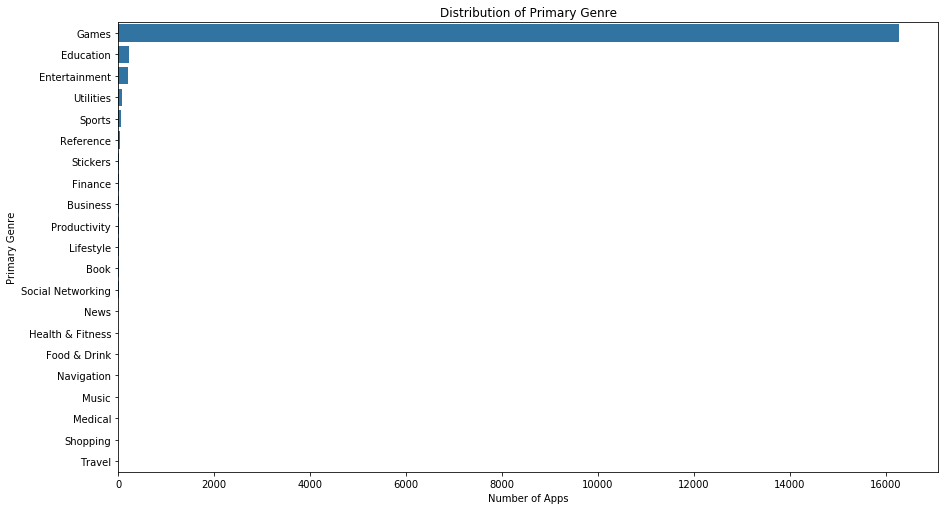

In [41]:
# Set plot dimensions
plt.figure(figsize=[14.70, 8.27])

# Create a count plot with proper labels
base_color = sb.color_palette()[0]
genre_order = df_clean['Primary Genre'].value_counts().index
sb.countplot(data=df_clean, y='Primary Genre', color=base_color, order=genre_order)
plt.xlabel('Number of Apps')
plt.title('Distribution of Primary Genre');

There are 21 primary genres. The most popular genres are Games (95.76%), Education (1.31%), and Entertainment (1.16%). The least popular genres are Shopping (0.006%), Travel (0.006%), and Medical(0.012%).

#### Average User Rating

In [42]:
# Number of rows for each rating value
df_clean['Average User Rating'].value_counts()

4.5    12307
4.0     1722
5.0      990
3.5      925
3.0      514
2.5      317
2.0      158
1.5       60
1.0       14
Name: Average User Rating, dtype: int64

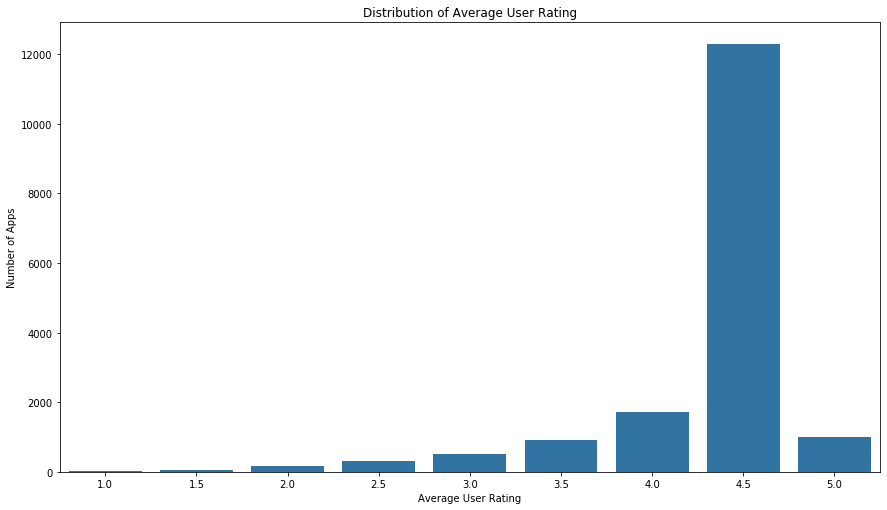

In [43]:
# Set plot dimensions
plt.figure(figsize=[14.70, 8.27])

# Create a count plot with proper labels
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='Average User Rating', color=base_color)
plt.ylabel('Number of Apps')
plt.title('Distribution of Average User Rating');

The average user rating ranges from 0 to 5.0. The majority of them is 4.5.

#### Price

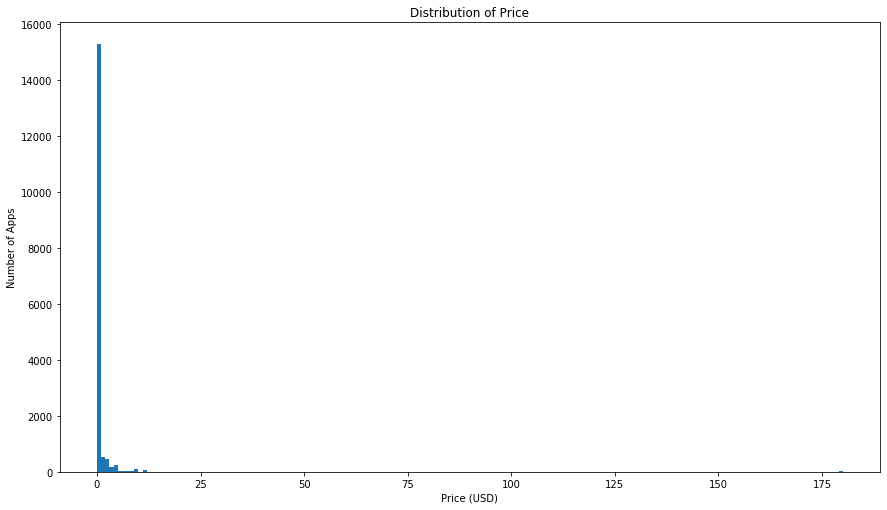

In [44]:
# Set plot dimensions
plt.figure(figsize=[14.70, 8.27])

# Create a histogram with proper labels
bin_edges = np.arange(0, df_clean['Price'].max()+1, 1)
plt.hist(data=df_clean, x='Price', bins=bin_edges)
plt.title('Distribution of Price')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Apps');

The price ranges from 0.00 to 179.99. 83.57% of the apps are free.

To make it easier to analyze, I will divide the price range into 4 brackets:
- Free: x = 0.00
- Low: 0.00 < x <= 4.99
- Medium: 4.99 < x <= 19.99
- High: x > 19.99

In [45]:
# Create a list to store the data
price_category = []

# Create the values for the price_category list using for loop
for price in df_clean['Price']:
    if price == 0:
        price_category.append('Free')
    elif price <= 4.99:
        price_category.append('Low')
    elif price <= 19.99:
        price_category.append('Medium')
    else:
        price_category.append('High')

# Create a column for the list
df_clean['Price Category'] = price_category

# View the new dataframe
df_clean.head()

,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Game Genre,Price Category
0,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"[DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...",15853568.0,Games,"[Games, Strategy, Puzzle]",2008-11-07,2017-05-30,Strategy,Low
1,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,[EN],12328960.0,Games,"[Games, Strategy, Board]",2008-11-07,2018-05-17,Strategy,Low
2,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,[EN],674816.0,Games,"[Games, Board, Strategy]",2008-11-07,2017-05-09,Board,Free
3,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"[DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...",21552128.0,Games,"[Games, Strategy, Puzzle]",2008-07-23,2017-05-30,Strategy,Free
4,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"[DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, R...",34689024.0,Games,"[Games, Strategy, Board, Education]",2008-07-18,2018-07-22,Strategy,Low


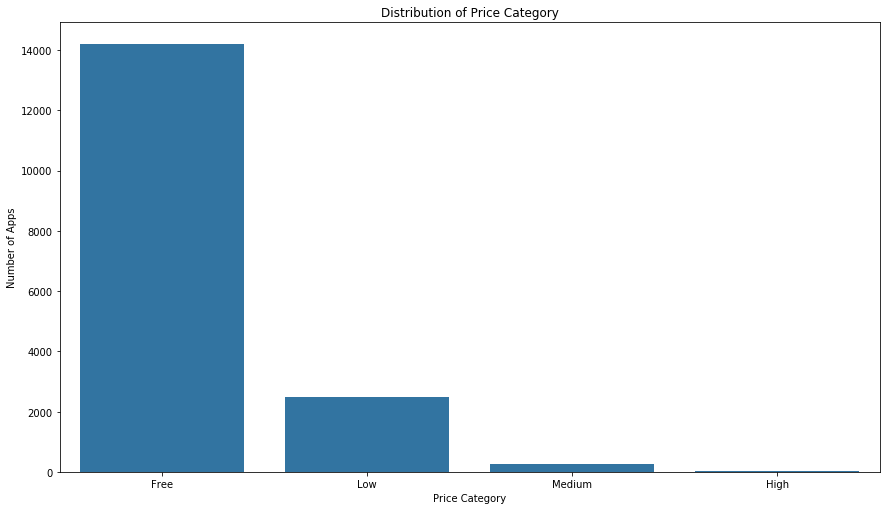

In [46]:
# Set plot dimensions
plt.figure(figsize=[14.70, 8.27])

# Create a count plot with proper labels
price_order = ['Free','Low','Medium','High']
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='Price Category', color=base_color, order=price_order)
plt.ylabel('Number of Apps')
plt.title('Distribution of Price Category');

As the price increases, the number of apps decreases. 82.39% of the apps is free. 14.63% is low. 1.59% is medium. 0.22% is high.

In [47]:
df_clean['Price Category'].value_counts()

Free      14212
Low        2488
Medium      270
High         37
Name: Price Category, dtype: int64

#### Age Rating

In [48]:
# Return a series containing counts of unique values in age rating
df_clean['Age Rating'].value_counts()

4+     11806
9+      2481
12+     2055
17+      665
Name: Age Rating, dtype: int64

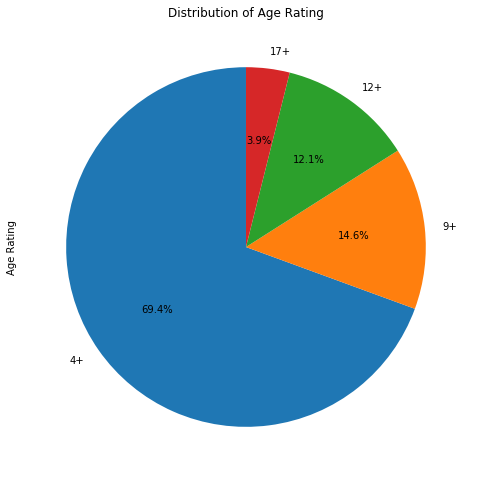

In [49]:
# Set plot dimensions
plt.figure(figsize=[14.70, 8.27])

# Create a pie chart with proper labels
df_clean['Age Rating'].value_counts().plot.pie(startangle=90,
                                              autopct='%1.1f%%')
plt.title('Distribution of Age Rating');

There are 4 age ratings: 4+, 9+, 12+, and 17+. 69.4% is 4+. 14.6% is 9+. 12.1% is 12+. 3.9% is 17+. As the age rating increases, the number of apps decreases.

#### Game Genre

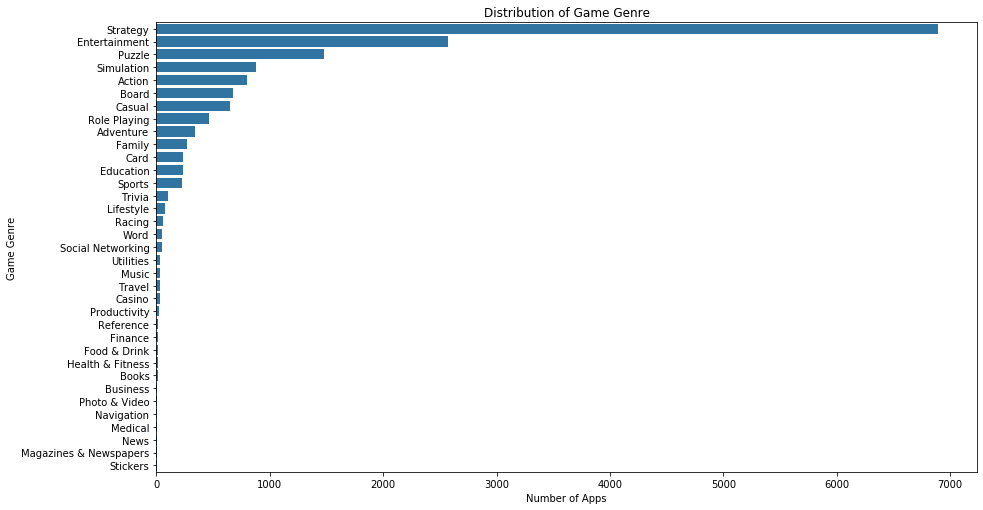

In [50]:
# Set plot dimensions
plt.figure(figsize=[14.70, 8.27])

# Create a count plot with proper labels
base_color = sb.color_palette()[0]
game_genre_order = df_clean['Game Genre'].value_counts().index
sb.countplot(data=df_clean, y='Game Genre', color=base_color, order=game_genre_order)
plt.xlabel('Number of Apps')
plt.title('Distribution of Game Genre');

The most popular game genres are strategy (42.31%), entertainment (15.76%), and puzzle (9.06%).

#### Developer

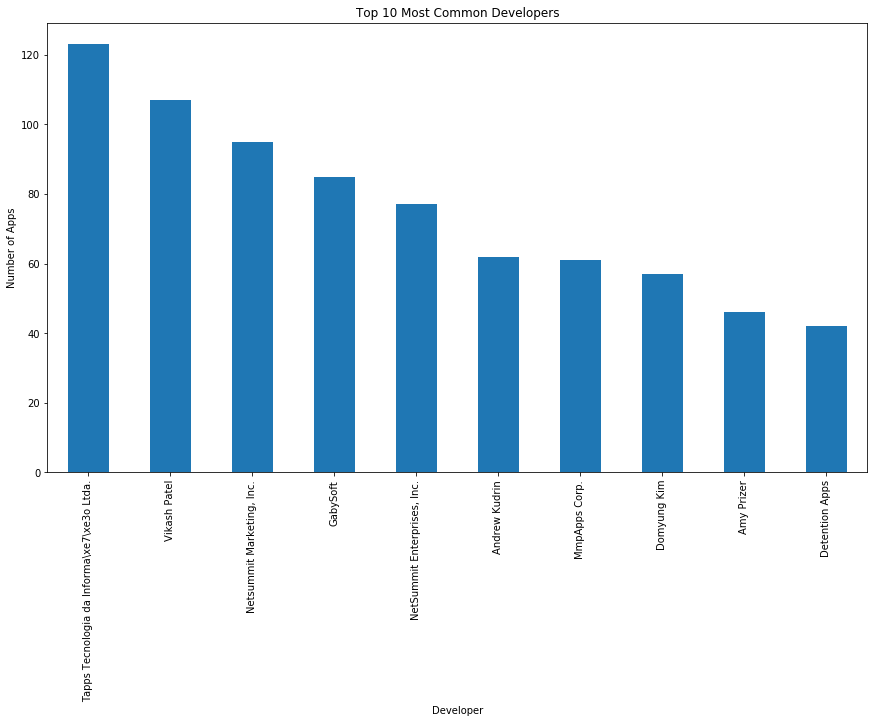

In [51]:
# Set plot dimensions
plt.figure(figsize=[14.70, 8.27])

# Create a bar plot with proper labels
df_clean['Developer'].value_counts()[:10].plot(kind='bar')
plt.xlabel('Developer')
plt.ylabel('Number of Apps')
plt.title('Top 10 Most Common Developers')
plt.xticks(rotation=90)
plt.show();

The most common developer is Tapps Tecnologia da Informa\xe7\xe3o Ltda. with 123 apps.

### Bivariate Exploration

#### Primary Genre and Average User Rating

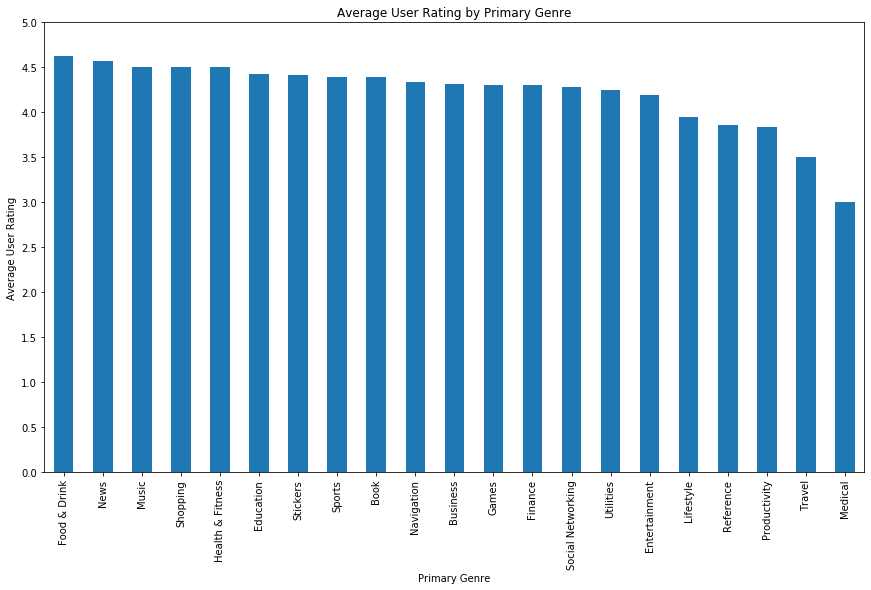

In [52]:
# Create a bar plot for primary genre and average user rating
df_clean.groupby('Primary Genre')['Average User Rating'].agg('mean').sort_values(ascending=False).plot.bar(figsize=(14.70, 8.27))
plt.title('Average User Rating by Primary Genre')
plt.ylabel('Average User Rating')
plt.xlabel('Primary Genre')
plt.yticks(np.arange(0, 5.5, 0.5));

The genres that have the highest average user ratings are Food & Drink (4.63), News (4.57), and Music (4.50).

#### Age Rating and Average User Rating

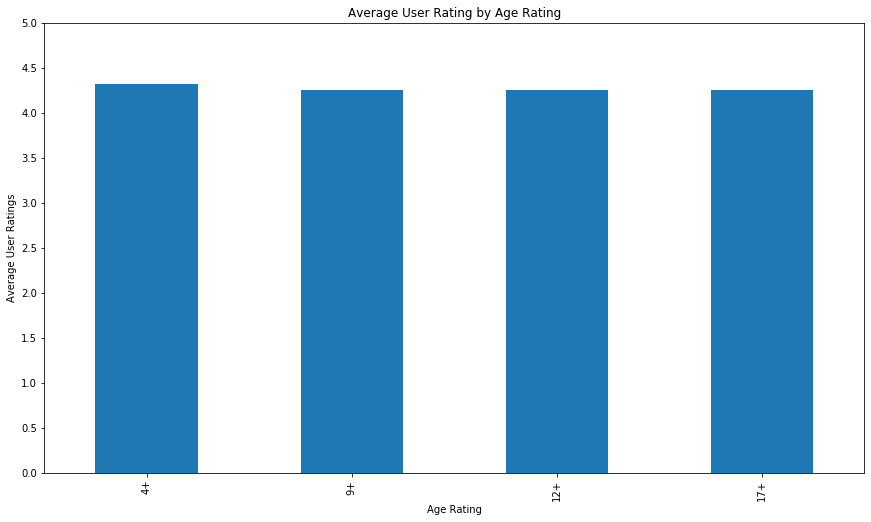

In [53]:
# Create a bar plot for age rating and average user rating
age_rating_order = ['4+', '9+', '12+', '17+']
df_clean.groupby('Age Rating')['Average User Rating'].agg('mean').loc[age_rating_order].plot.bar(figsize=(14.70, 8.27))
plt.title('Average User Rating by Age Rating')
plt.xlabel('Age Rating')
plt.ylabel('Average User Ratings')
plt.yticks(np.arange(0, 5.5, 0.5));

Age rating 4+ has the highest average user rating (4.33). Age rating 12+ has the lowest average user rating (4.25). All 4 age ratings have similar average user ratings, and there is not much difference among them.

#### Price and Average User Rating

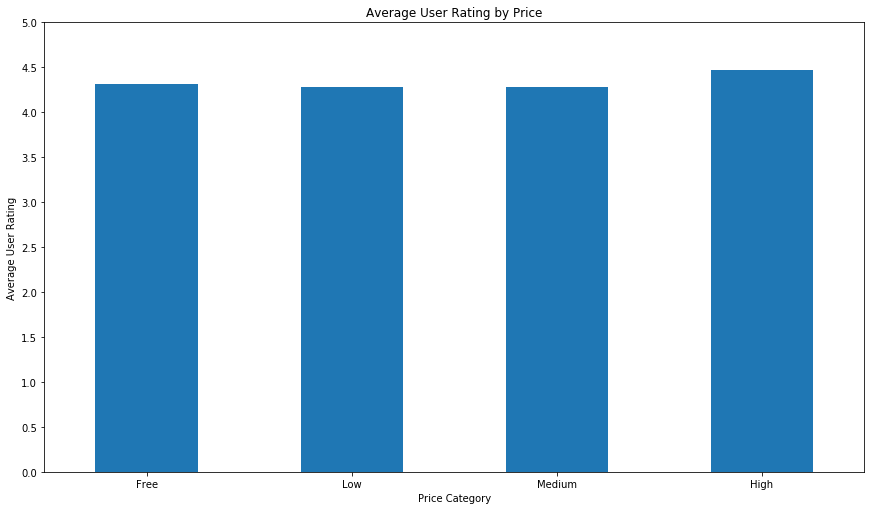

In [54]:
# Create a bar plot for primary genre and average user rating
price_order = ['Free', 'Low', 'Medium', 'High']
df_clean.groupby('Price Category')['Average User Rating'].agg('mean').sort_values(ascending=False).loc[price_order].plot.bar(figsize=(14.70, 8.27))
plt.title('Average User Rating by Price')
plt.xlabel('Price Category')
plt.ylabel('Average User Rating')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 5.5, 0.5));

The high price category has the highest average user rating (4.31), and the low category has the lowest average user rating (4.28). The average user ratings of all price categories are quite similar, and there does not seem to be a correlation between price and average user rating.

#### Game Genre and Average User Rating

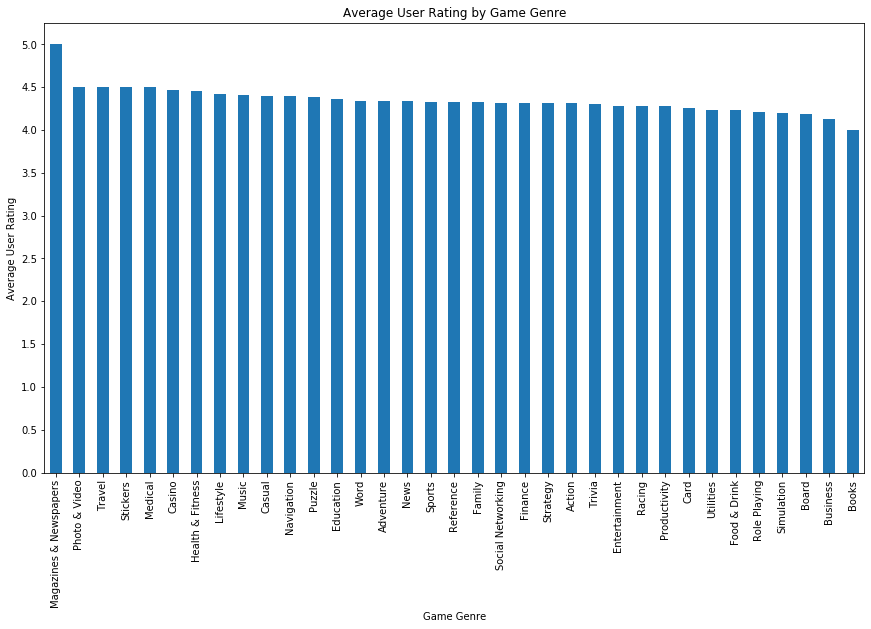

In [55]:
# Create a bar plot for game genre and average user rating
df_clean.groupby('Game Genre')['Average User Rating'].agg('mean').sort_values(ascending=False).plot.bar(figsize=(14.70, 8.27))
plt.title('Average User Rating by Game Genre')
plt.ylabel('Average User Rating')
plt.xlabel('Game Genre')
plt.yticks(np.arange(0, 5.5, 0.5));

For the apps that have primary genre as Games, Magazines & Newspapers has the highest average user rating (5.00), and Books has the lowest average user rating (4.00).

#### Primary Genre and Age Rating

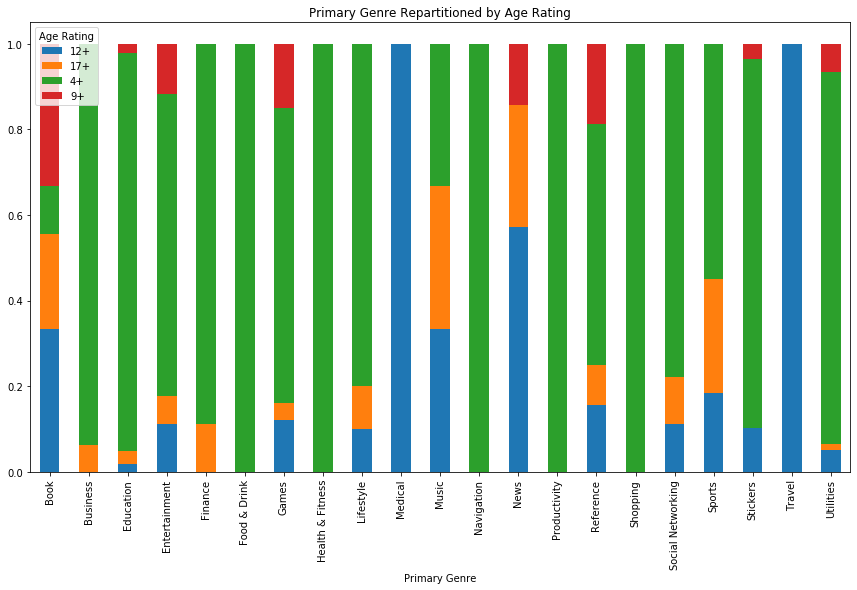

In [56]:
# Create a crosstab table for primary genre and age rating
genre_age = pd.crosstab(df_clean['Primary Genre'], df_clean['Age Rating'], normalize=0)

# Plot a stacked bar chart for primary genre and age rating
genre_age.plot.bar(stacked=True, figsize=[14.70, 8.27])
plt.title('Primary Genre Repartitioned by Age Rating')
plt.show();

In all genres except for Book and Music, age 4+ holds the highest proportion.

#### Size and Average User Rating

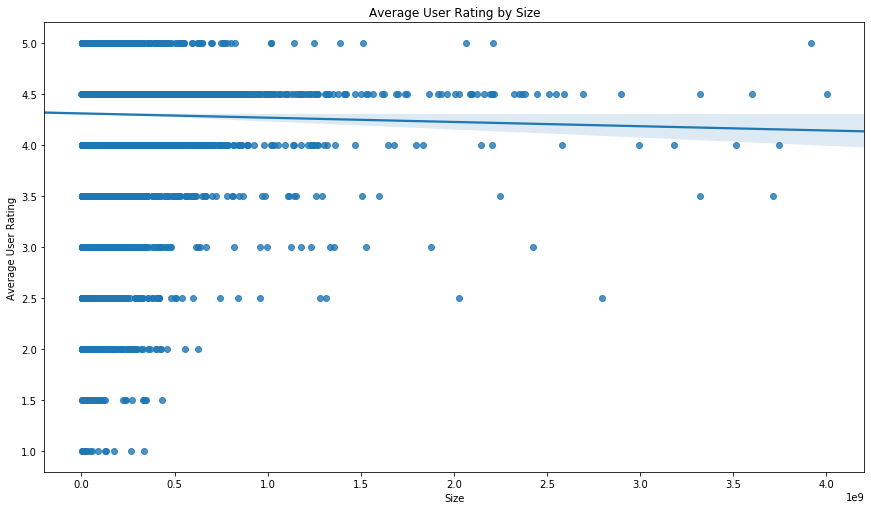

In [57]:
# Set plot dimensions
plt.figure(figsize=[14.70, 8.27])

# Create a regplot for size and average user rating
ax = sb.regplot(x='Size', y='Average User Rating', data=df_clean)
plt.title('Average User Rating by Size');

There is little negative relationship between size and average user rating.

#### Size and Original Release Date

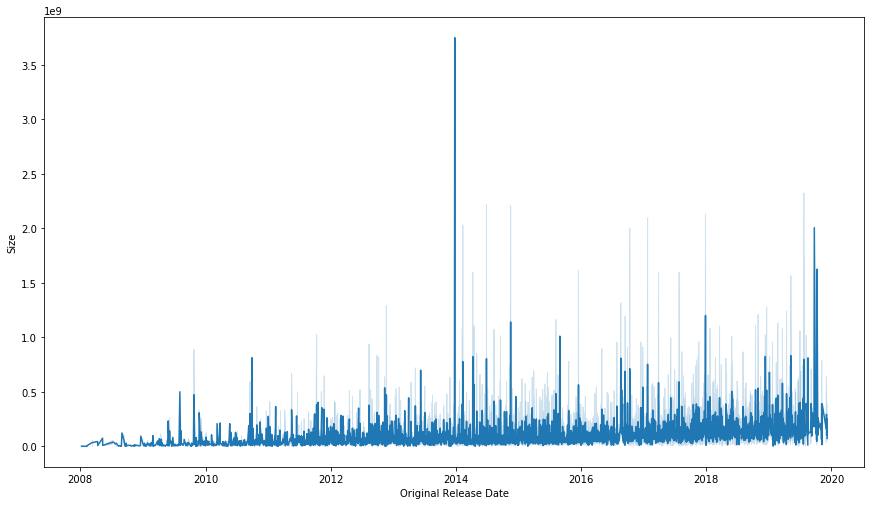

In [58]:
# Set plot dimensions
plt.figure(figsize=[14.70, 8.27])

# Create a lineplot for size and original release date
sb.lineplot(data=df_clean, x='Original Release Date',
           y='Size')
plt.xlabel('Original Release Date')
plt.ylabel('Size');

The average size of apps tends to increase over time. There are a few times where there were spikes in average size. The highest one is in 2014 where the average increases to more than 3.5x(10^9) bytes.

### Multivariate Exploration

#### Primary Genre, Age Rating, and Average User Rating

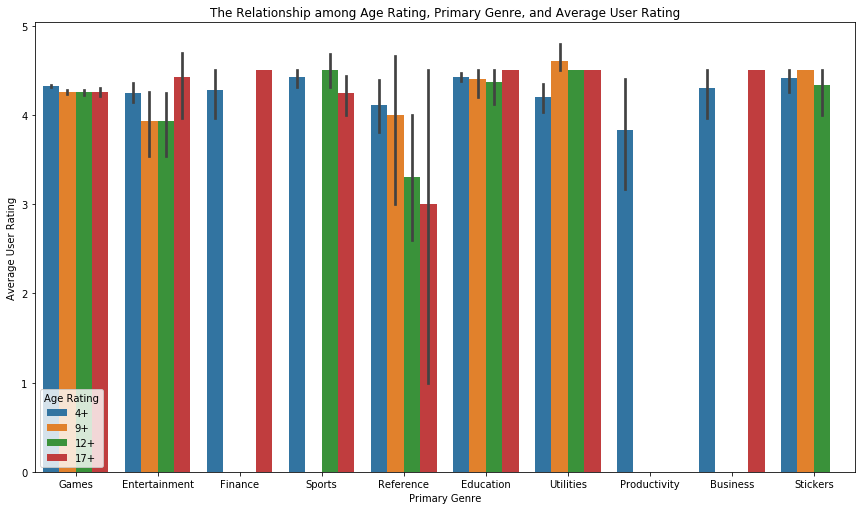

In [59]:
plt.figure(figsize=[14.70, 8.27])
top_genre = df_clean['Primary Genre'].value_counts().head(10).index
df_top_genre = df_clean[df_clean['Primary Genre'].isin(top_genre)]
sb.barplot(data=df_top_genre, x='Primary Genre', y='Average User Rating', hue='Age Rating')
plt.xlabel('Primary Genre')
plt.ylabel('Average User Rating')
plt.legend(title='Age Rating')
plt.title('The Relationship among Age Rating, Primary Genre, and Average User Rating');

For each of the top 10 genres, there does not seem to be a correlation between age rating and average user rating.

#### Age Rating, Price Category, and Average User Rating

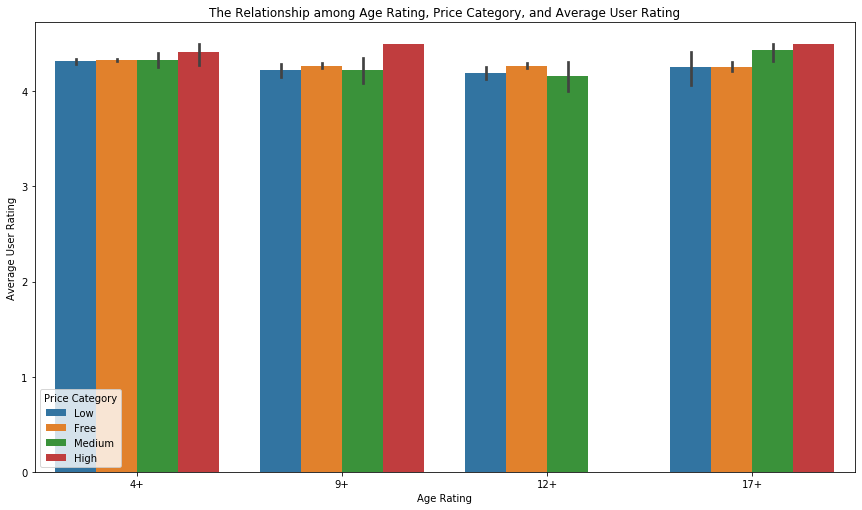

In [60]:
# Create scatter plots for price category, age rating, and average user rating
plt.figure(figsize=[14.70, 8.27])
sb.barplot(data=df_clean, x='Age Rating', y='Average User Rating', hue='Price Category')
plt.xlabel('Age Rating')
plt.ylabel('Average User Rating')
plt.legend(title='Price Category')
plt.title('The Relationship among Age Rating, Price Category, and Average User Rating');

For all age ratings, the average user ratings for price categories are higher than 4.0, except high price category - age rating 12+.

There does not seem to be a correlation between price category and average user rating for all age ratings.